In [73]:
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline
import pandas as pd
import numpy as np
from PIL import Image
from skimage.feature import hog
from skimage.color import rgb2grey
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc

In [41]:
labels = pd.read_csv("/Users/devan/Desktop/AMLS_20-21_SN12345678/Datasets/cartoon_set/labels.csv", index_col=0)
labels.head()
sample_size = 150
labels=labels.drop(labels.index[sample_size:])
labels.drop("eye_color",axis=1)

,face_shape,file_name
0,4,0.png
1,4,1.png
2,3,2.png
3,0,3.png
4,2,4.png
...,...,...
145,4,145.png
146,4,146.png
147,0,147.png
148,2,148.png


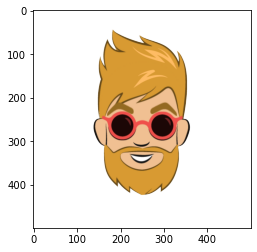

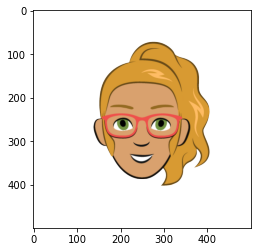

In [72]:


def get_image(row_id, root="/Users/devan/Desktop/AMLS_20-21_SN12345678/Datasets/cartoon_set/img"):
    """
    Converts an image number into the file path where the image is located, 
    opens the image, and returns the image as a numpy array.
    """
    filename = "{}.png".format(row_id)
    file_path = os.path.join(root, filename)
    img = Image.open(file_path)
    return np.array(img)

shape1_row = labels[labels.face_shape == 4.0].index[0]
plt.imshow(get_image(shape1_row))
plt.show()
shape2_row = labels[labels.face_shape == 3.0].index[0]
plt.imshow(get_image(shape2_row))
plt.show()

Color bombus image has shape:  [[[255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]
  ...
  [255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]]

 [[255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]
  ...
  [255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]]

 [[255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]
  ...
  [255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]]

 ...

 [[255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]
  ...
  [255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]]

 [[255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]
  ...
  [255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]]

 [[255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]
  ...
  [255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]]]
Greyscale bombus image has shape:  [[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


<ipython-input-43-4605fbb30ecf>:7: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  grey_shape1 = rgb2grey(shape1)
C:\Users\devan\Anaconda3\envs\AMLS\lib\site-packages\skimage\color\colorconv.py:794: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  return rgb2gray(rgb)


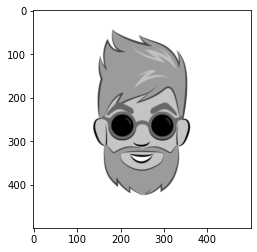

In [43]:
# load a bombus image using our get_image function and bombus_row from the previous cell
shape1 = get_image(shape1_row)
shape2 = get_image(shape2_row)
print('Color bombus image has shape: ', shape1)

# convert the bombus image to greyscale
grey_shape1 = rgb2grey(shape1)

plt.imshow(grey_shape1, cmap=mpl.cm.gray)

print('Greyscale bombus image has shape: ', grey_shape1)

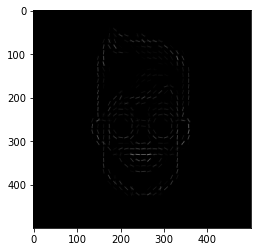

In [44]:
hog_features, hog_image = hog(grey_shape1,
                              visualize=True,
                              block_norm='L2-Hys',
                              pixels_per_cell=(13, 13))

plt.imshow(hog_image, cmap=mpl.cm.gray)

In [45]:
def create_features(img):
    # flatten three channel color image
    color_features = img.flatten()
    # convert image to greyscale
    grey_image = rgb2grey(img)
    # get HOG features from greyscale image
    hog_features = hog(grey_image, block_norm='L2-Hys', pixels_per_cell=(16, 16))
    # combine color and hog features into a single array
    flat_features = np.hstack(color_features)
    return flat_features

shape2_features = create_features(shape2)

print(shape2_features.shape)

<ipython-input-45-44bcd7038e27>:5: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  grey_image = rgb2grey(img)


(1000000,)


In [46]:
def create_feature_matrix(label_dataframe):
    features_list = []
    
    for img_id in label_dataframe.index:
        # load image
        img = get_image(img_id)
        # get features for image
        image_features = create_features(img)
        features_list.append(image_features)
        
    # convert list of arrays into a matrix
    feature_matrix = np.array(features_list)
    return feature_matrix

# run create_feature_matrix on our dataframe of images
feature_matrix = create_feature_matrix(labels)
print(feature_matrix)

<ipython-input-45-44bcd7038e27>:5: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  grey_image = rgb2grey(img)


[[255 255 255 ... 255 255   0]
 [255 255 255 ... 255 255   0]
 [255 255 255 ... 255 255   0]
 ...
 [255 255 255 ... 255 255   0]
 [255 255 255 ... 255 255   0]
 [255 255 255 ... 255 255   0]]


In [47]:
# get shape of feature matrix
print('Feature matrix shape is: ', feature_matrix.shape)

# define standard scaler
ss = StandardScaler()
# run this on our feature matrix
shape_stand = ss.fit_transform(feature_matrix)

pca = PCA(n_components=500)
# use fit_transform to run PCA on our standardized matrix
shape_pca = ss.fit_transform(shape_stand)
# look at new shape
print('PCA matrix shape is: ', shape_pca.shape)

Feature matrix shape is:  (150, 1000000)
PCA matrix shape is:  (150, 1000000)


In [48]:
X = pd.DataFrame(shape_pca)
y = pd.Series(labels.face_shape.values)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=.3,
                                                    random_state=1234123)

# look at the distrubution of labels in the train set
pd.Series(y_train).value_counts()

3    24
0    23
2    21
1    20
4    17
dtype: int64

In [53]:
# define support vector classifier
svm = SVC(kernel='linear', probability=True, random_state=42)

# fit model
svm.fit(X_train, y_train)

SVC(kernel='linear', probability=True, random_state=42)

In [54]:
# generate predictions
y_pred = svm.predict(X_test)

# calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Model accuracy is: ', accuracy)

Model accuracy is:  0.6666666666666666


In [87]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 6)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=6)

In [88]:
model.score(X_test, y_test)

0.9777777777777777

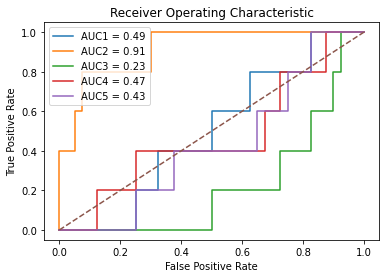

In [70]:
# predict probabilities for X_test using predict_proba
probabilities = svm.predict_proba(X_test)

# select the probabilities for labels 0,1,2,3 and 4
y_proba0 = probabilities[:, 0]
y_proba1 = probabilities[:, 1]
y_proba2 = probabilities[:, 2]
y_proba3 = probabilities[:, 3]
y_proba4 = probabilities[:, 4]
# calculate false positive rate and true positive rate at different thresholds
false_positive_rate0, true_positive_rate0, thresholds = roc_curve(y_test, y_proba0, pos_label=1)
false_positive_rate1, true_positive_rate1, thresholds = roc_curve(y_test, y_proba1, pos_label=1)
false_positive_rate2, true_positive_rate2, thresholds = roc_curve(y_test, y_proba2, pos_label=1)
false_positive_rate3, true_positive_rate3, thresholds = roc_curve(y_test, y_proba3, pos_label=1)
false_positive_rate4, true_positive_rate4, thresholds = roc_curve(y_test, y_proba4, pos_label=1)
# calculate AUC
roc_auc0 = auc(false_positive_rate0, true_positive_rate0)
roc_auc1 = auc(false_positive_rate1, true_positive_rate1)
roc_auc2 = auc(false_positive_rate2, true_positive_rate2)
roc_auc3 = auc(false_positive_rate3, true_positive_rate3)
roc_auc4 = auc(false_positive_rate4, true_positive_rate4)

plt.title('Receiver Operating Characteristic')
# plot the false positive rate on the x axis and the true positive rate on the y axis
roc_plot0 = plt.plot(false_positive_rate0,
                    true_positive_rate0,
                    label='AUC1 = {:0.2f}'.format(roc_auc0))
roc_plot1 = plt.plot(false_positive_rate1,
                    true_positive_rate1,
                    label='AUC2 = {:0.2f}'.format(roc_auc1))
roc_plot2 = plt.plot(false_positive_rate2,
                    true_positive_rate2,
                    label='AUC3 = {:0.2f}'.format(roc_auc2))
roc_plot3 = plt.plot(false_positive_rate3,
                    true_positive_rate3,
                    label='AUC4 = {:0.2f}'.format(roc_auc3))
roc_plot4 = plt.plot(false_positive_rate4,
                    true_positive_rate4,
                    label='AUC5 = {:0.2f}'.format(roc_auc4))
plt.legend(loc=0)
plt.plot([0,1], [0,1], ls='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate');